In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('data2.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
data.shape

(918, 12)

In [8]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['ChestPainType'] = label_encoder.fit_transform(data['ChestPainType'])
data['RestingECG'] = label_encoder.fit_transform(data['RestingECG'])
data['ExerciseAngina'] = label_encoder.fit_transform(data['ExerciseAngina'])
data['ST_Slope'] = label_encoder.fit_transform(data['ST_Slope'])

In [13]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [14]:
data.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


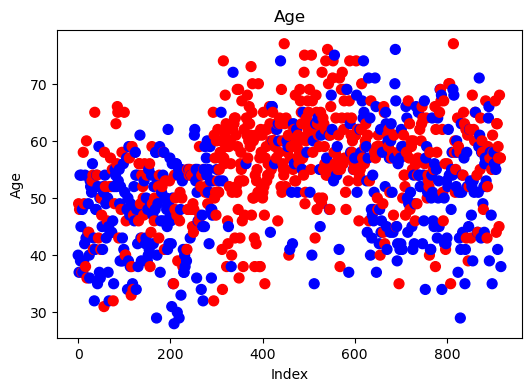

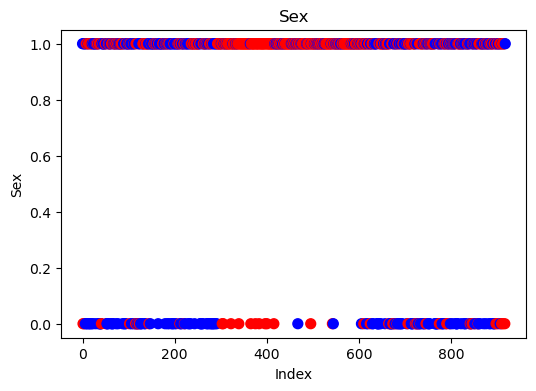

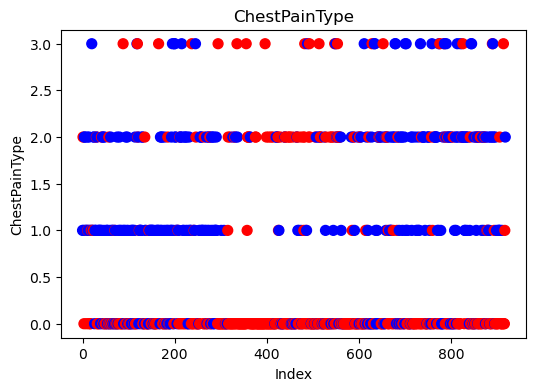

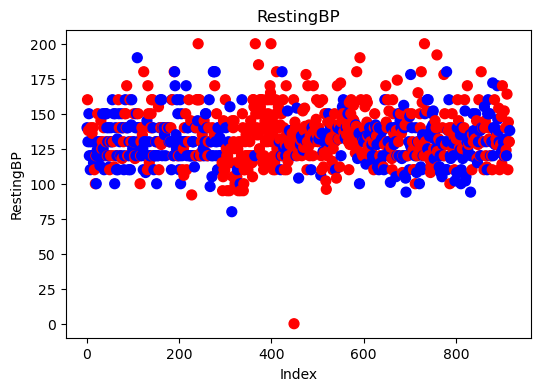

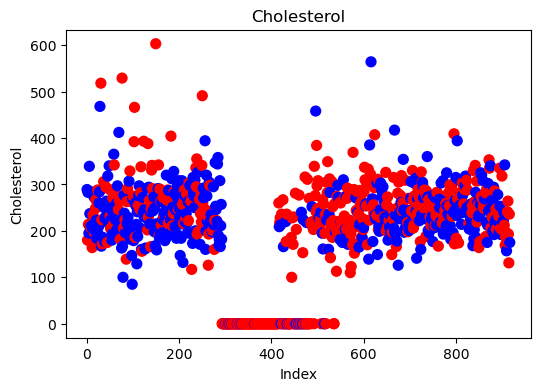

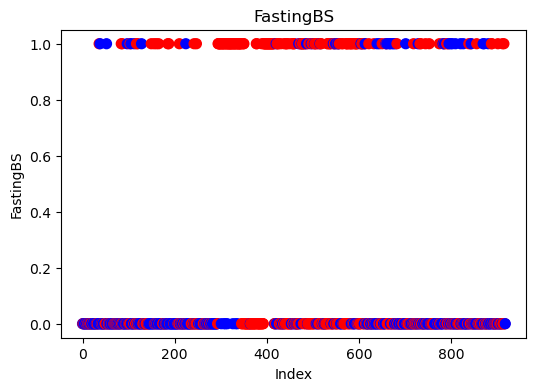

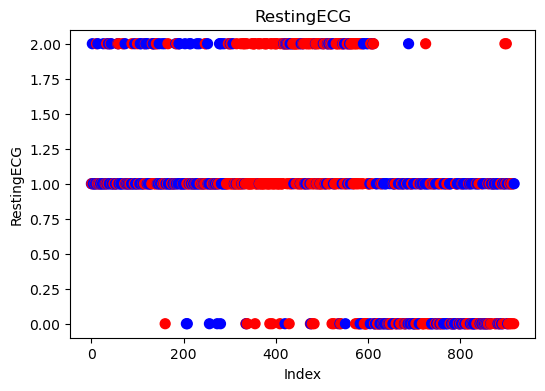

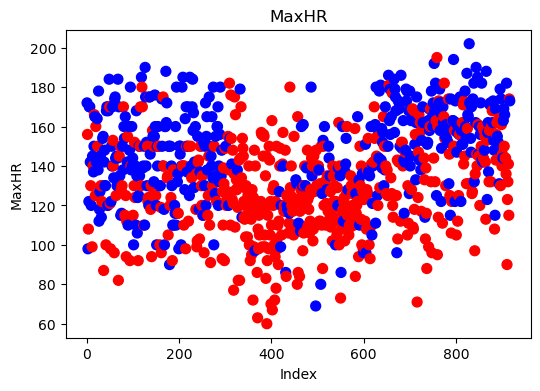

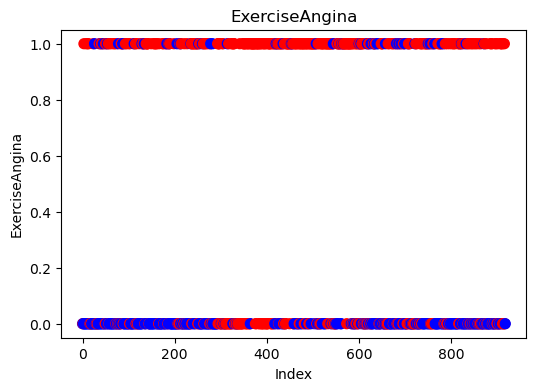

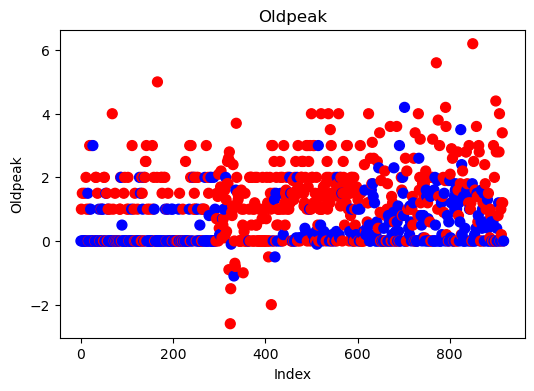

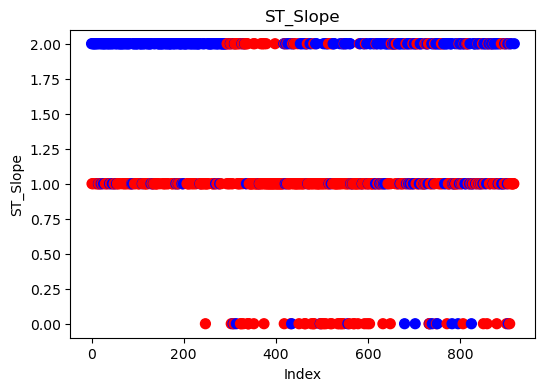

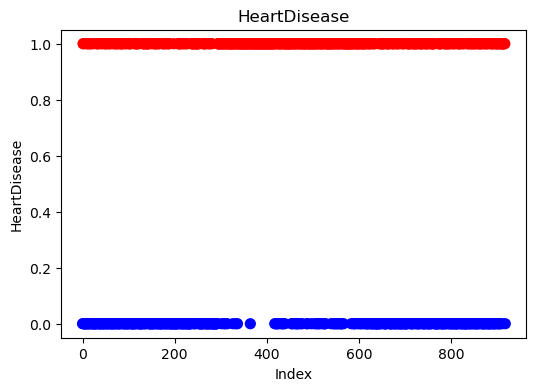

In [15]:
for i in data.columns.to_list():
    plt.figure(figsize=(6, 4))
    colors = ['red' if is_true else 'blue' for is_true in data['HeartDisease']]
    plt.scatter(range(len(data[i])), data[i], color=colors, s=50)
    plt.title(i)
    plt.xlabel("Index")
    plt.ylabel(i)
    plt.show()

In [17]:
data.drop_duplicates(inplace=True)

In [20]:
target_counts = data['HeartDisease'].value_counts()
print(target_counts)

HeartDisease
1    508
0    410
Name: count, dtype: int64


In [21]:
y=data['HeartDisease']
x=data.drop(['HeartDisease'],axis=1)

### SMOTE

In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42,sampling_strategy=1.0)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

### BERUTA

In [29]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

x_train_balanced = pd.DataFrame(x_train_balanced, columns=x.columns)
x_test = pd.DataFrame(x_test, columns=x.columns)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
boruta = BorutaPy(estimator=rf, n_estimators='auto', random_state=42)

boruta.fit(x_train_balanced, y_train_balanced)

selected_features = x_train_balanced.columns[boruta.support_].tolist()
print("Selected Features:", selected_features)

ranking = boruta.ranking_
print("Feature Ranking:", ranking)
x_train_selected = boruta.transform(x_train_balanced.values)
x_test_selected = boruta.transform(x_test.values)

Selected Features: ['Age', 'ChestPainType', 'Cholesterol', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
Feature Ranking: [1 3 1 2 1 4 5 1 1 1 1]


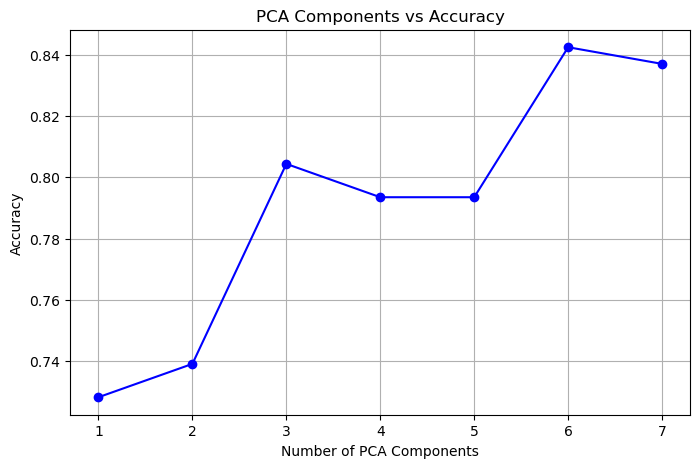

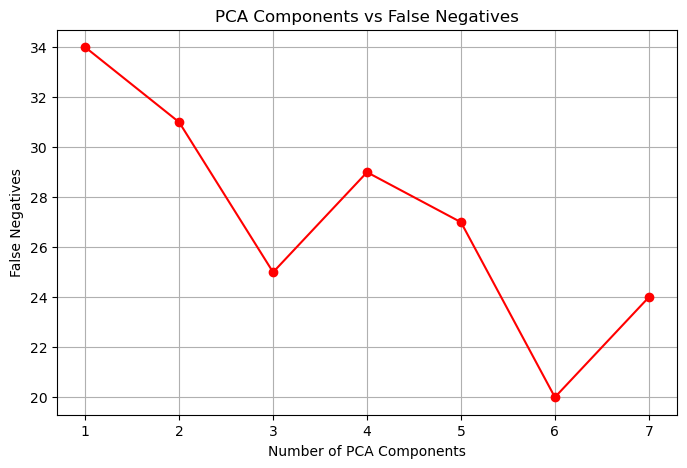

In [31]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

components_range = range(1, x_train_selected.shape[1] + 1)
accuracies = []
falsenegatives=[]

for n_components in components_range:
    pca = PCA(n_components=n_components)
    x_train_pca = pca.fit_transform(x_train_selected)
    x_test_pca = pca.transform(x_test_selected)
    
    model = RandomForestClassifier(random_state=42)
    model.fit(x_train_pca, y_train_balanced)
    
    y_pred = model.predict(x_test_pca)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    cm = confusion_matrix(y_test, y_pred)
    fn = cm[1, 0]
    falsenegatives.append(fn)


plt.figure(figsize=(8, 5))
plt.plot(components_range, accuracies, marker='o', linestyle='-', color='b')
plt.title('PCA Components vs Accuracy')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(components_range, falsenegatives, marker='o', linestyle='-', color='red')
plt.title('PCA Components vs False Negatives')
plt.xlabel('Number of PCA Components')
plt.ylabel('False Negatives')
plt.grid()
plt.show()

### N-component selected - 6 

In [33]:
pca = PCA(n_components=6)
x_train_pca = pca.fit_transform(x_train_balanced)
x_test_pca = pca.transform(x_test)

In [51]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train_pca, x_test_pca, y_train_balanced, y_test)

models.head()

100%|██████████| 29/29 [00:01<00:00, 27.97it/s]

[LightGBM] [Info] Number of positive: 401, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 802, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
KNeighborsClassifier,0.87,0.87,0.87,0.87,0.02
RandomForestClassifier,0.85,0.86,0.86,0.85,0.22
ExtraTreesClassifier,0.85,0.86,0.86,0.85,0.13
SVC,0.85,0.86,0.86,0.85,0.02
XGBClassifier,0.85,0.85,0.85,0.85,0.07


### Selected Model - RandomForestClassifier

### Random Forest

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


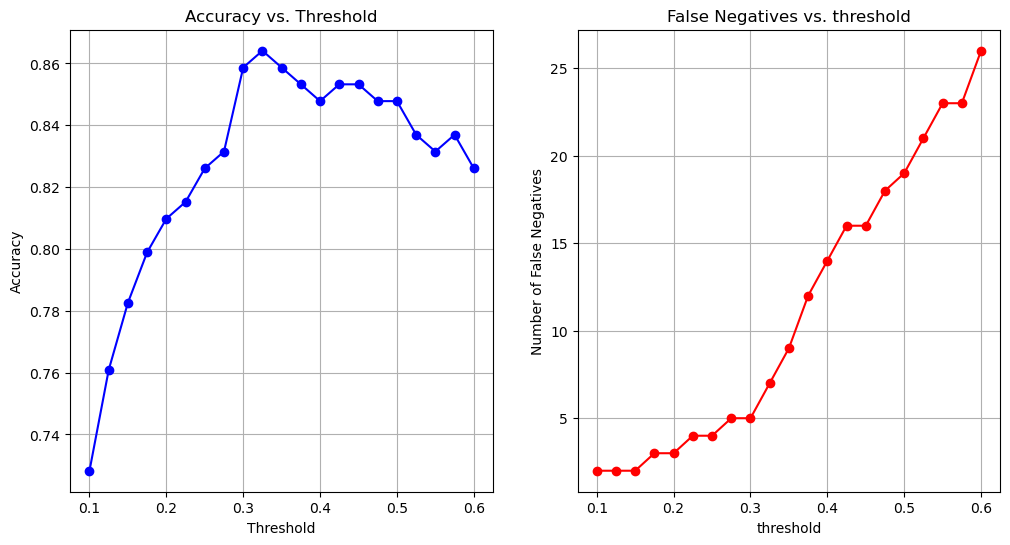

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, confusion_matrix, ConfusionMatrixDisplay

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='recall', verbose=1, n_jobs=-1)

grid_search.fit(x_train_pca, y_train_balanced)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(x_test_pca)[:,1]

thresholds = np.linspace(0.1,0.6,21)
accuracies=[]
false_negatives=[]
for i in thresholds:
    y_pred = (y_pred_proba >= i).astype(int)
    accuracies.append(accuracy_score(y_test, y_pred))
    cm=confusion_matrix(y_test,y_pred)
    false_negatives.append(cm[1,0])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(thresholds, accuracies, marker='o', color='blue', label='Accuracy')
plt.title('Accuracy vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(thresholds, false_negatives, marker='o', color='red', label='False Negatives')
plt.title('False Negatives vs. threshold')
plt.xlabel('threshold')
plt.ylabel('Number of False Negatives')
plt.grid(True)
plt.show()

### Selected Threshold - 0.31

In [60]:
y_pred = (y_pred_proba >= 0.31).astype(int)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

0.8695652173913043
[[ 58  19]
 [  5 102]]


### So for this data,
#### Accuracy 0.87
#### False Negatives 5